In [31]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [32]:
data_path = '../data/test4.jpg'

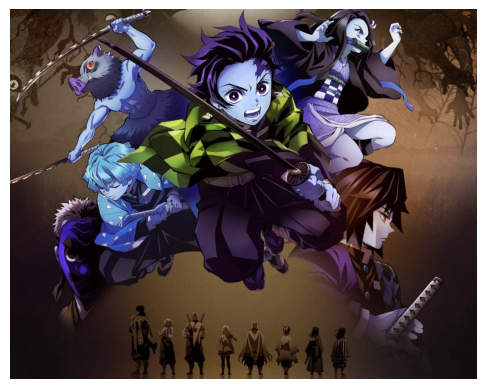

In [33]:
img = cv2.imread(data_path)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [34]:
print(img.shape)

(1521, 1920, 3)


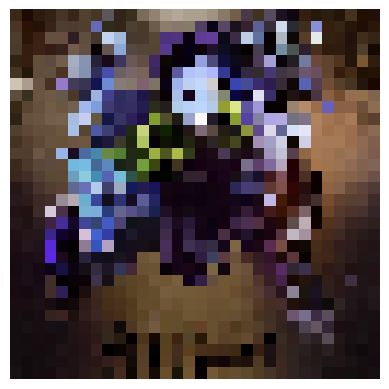

In [35]:
img = cv2.resize(img, (32, 32)) # resizing to save my laptop from burning
plt.imshow(img)
plt.axis('off')
plt.show()

In [36]:
img.shape

(32, 32, 3)

In [37]:
def add_padding(img, padding):
    try:
        height, width, channels = img.shape
    except:
        try:
            height, width = img.shape # incase greyscale
        except:
            raise ValueError('Image shape is not valid')
    # height, width, channels = img.shap
        
    # if type(pad_size) == tuple:
    #     pad_height, pad_width = pad_size
    # elif type(pad_size) == int:
    #     pad_height, pad_width = pad_size, pad_size
    # else:
    #     pad_height, pad_width = 0, 0
    pad_height, pad_width = padding

    res_height, res_width = height + 2 * pad_height, width + 2 * pad_width

    res = [[[0 for _ in range(channels)] for _ in range(res_width)] for _ in range(res_height)]
    # print(res[pad_height:pad_height+height, pad_width:pad_width+width, :])# = img[:, :, :]
    # res[pad_height:pad_height+height][pad_width:pad_width+width] = img[:][:][:]
    for i in range(height):
        for j in range(width):
            res[i+pad_height][j+pad_width] = img[i][j]

    return res

In [38]:
def init(img, kernel, padding, stride):
    if type(padding) == tuple:
        pad_height, pad_width = padding
    elif type(padding) == int:
        pad_height, pad_width = padding, padding
    else:
        pad_height, pad_width = 0, 0

    if type(stride) == tuple:
        stride_height, stride_width = stride
    elif type(stride) == int:
        stride_height, stride_width = stride, stride
    else:
        stride_height, stride_width = 1, 1

    res_height = (img.shape[0] - len(kernel) + 2 * pad_height) // stride_height + 1
    res_width = (img.shape[1] - len(kernel[0]) + 2 * pad_width) // stride_width + 1

    img = add_padding(img, (pad_height, pad_width))

    return img, res_height, res_width, stride_height, stride_width

In [39]:
res = np.array(add_padding(img, (1, 1)))
res.shape

(34, 34, 3)

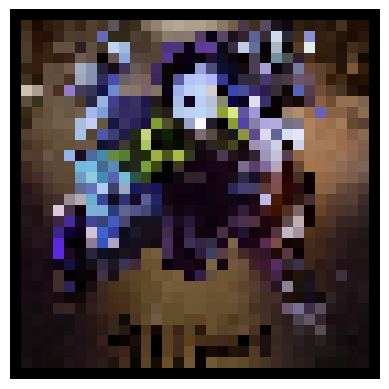

In [40]:
plt.imshow(res)
plt.axis('off')
plt.show()

In [41]:
def convolve(img, kernel, padding=0, stride=1):
    img, res_height, res_width, stride_height, stride_width = init(img, kernel, padding, stride) # gives back the padded image
    res = [[[0 for k in range(len(img[0][0]))] for j in range(res_width)] for i in range(res_height)]
    
    kernel_height = len(kernel)
    kernel_width = len(kernel[0])

    kernel = np.array(kernel) 
    sum_kernel = np.sum(kernel)
    sum_kernel = sum_kernel if sum_kernel > 0 else 1
    res = np.array(res)
    img = np.array(img)

    for k in range(img.shape[-1]):
        for i in range(0, res_height):
            for j in range(0, res_width):
                id_x = i * stride_height
                id_y = j * stride_width
                patch = img[id_x:id_x+kernel_height, id_y:id_y+kernel_width, k]
                # print(patch.shape, kernel.shape, (patch * kernel).shape)
                res[i][j][k] = np.sum(patch * kernel) / sum_kernel
    
    return res

In [42]:
kernel = [[0.4, 0.6, 0.4], [0.6, 0.8, 0.6], [0.4, 0.6, 0.4]] # gaussian blur
len(kernel[0])

3

In [43]:
new_img = convolve(img, kernel, 1, 1)

In [44]:
print(len(new_img))
print(len(new_img[0]))

32
32


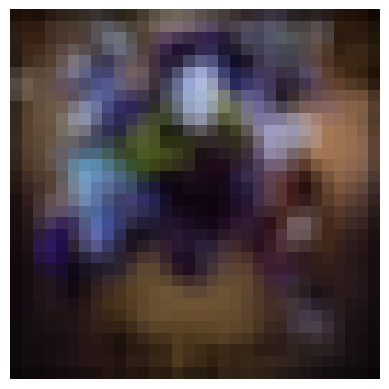

In [45]:
plt.imshow(new_img)
plt.axis('off')
plt.show()